In [1]:
import numpy as np
import bayestme
import bayestme_data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the spatial transcriptomics data
1. use `load_data_from_count_mat`, if the ST data is a tsv file, where the column names and row names are position and gene names respectively, e.g. melanoma data from Thrane 2018

In [2]:
melanoma = bayestme.BayesTME(exp_name='melanoma')
melanoma_stdata = melanoma.load_data_from_count_mat('data/ST_mel1_rep2_counts.tsv')

detected 293 spots, 16148 genes
Data saved in melanoma_results/


2. use `load_data_from_spaceranger`, if loading from standard space ranger output

In [3]:
zebrafish_A1 = bayestme.BayesTME(exp_name='zebrafish_A1', storage_path='zebrafish_A1_data')
zebrafish_A1_stdata = zebrafish_A1.load_data_from_spaceranger('/Users/hrzhang/Dropbox/A1_spaceranger_output/A1_spaceranger_output')

detected 4992 spots, 32268 genes
	 2179 spots in tissue sample
	 31.740% UMI counts bleeds out
Data saved in zebrafish_A1_data/


the loaded data are automatically stored at directory `{exp_name}_results/`. the storage directory can be change by specifying `storage_path` when calling `bayestme.BayesTME`

### Preprocessing the data
1. narrow down the number of gene to look at for cell-typing, by specifying `n_gene`

2. filter out certain class of genes <br>
   built-in filters: <br>
    1)  'ribosome' (recommand): ribosome genes, i.e. rpl and rps genes <br>
    2)  'spots': universial genes that are observed in more than n% percent of the sample (defualt 95%) <br>
    user can also pass in custom pattern or select gene idx for filtering

In [3]:
melanoma_stdata.filter(n_gene=1000, filter_type='ribosome')

filtering top 1000 genes from original 16148 genes...
filtering out ribosome genes...
	 82 genes filtered out
Resulting dataset: 293 spots, 918 genes
Data saved in melanoma_results/


In [5]:
zebrafish_A1_stdata.filter(n_gene=1000, filter_type='ribosome', verbose=True)

filtering top 1000 genes from original 32268 genes...
filtering out ribosome genes...
	 81 genes filtered out
['rpl14' 'rps18' 'rpl30' 'rpl31' 'rpl36' 'rpl15' 'rps27.1' 'rpl7a' 'rps12'
 'rpl18' 'rps7' 'rps24' 'rpl21' 'rplp2l' 'rps8a' 'rpl5b' 'RPL37A' 'rpl29'
 'rpl36a' 'rpl9' 'rpl35' 'rpl39' 'rpl18a' 'rps13' 'rps21' 'rpl10' 'rps16'
 'rpl6' 'rplp1' 'rps26l' 'rps3a' 'rpl26' 'rpl13a' 'rpl12' 'rps15a'
 'rpl35a' 'rpl11' 'rps19' 'rpl24' 'rpl5a' 'rps29' 'rpl7' 'rps20' 'rps28'
 'rps3' 'rps26' 'rps14' 'rpl23a' 'rps10' 'rpl10a' 'rps25' 'rps17' 'rpl4'
 'rps27a' 'rps6' 'rpl34' 'rpl8' 'rpl32' 'rps23' 'rpl19' 'rpl37' 'rps15'
 'rpl13' 'rpl22' 'rpl17' 'rpsa' 'RPS17' 'rps4x' 'rps9' 'rpl3' 'rpl38'
 'rps27.2' 'rpl28' 'rpl22l1' 'rplp0' 'RPL41' 'rpl23' 'rps5' 'rps2' 'rpl27'
 'rps11']
Resulting dataset: 2179 spots, 919 genes
Data saved in zebrafish_A1_data/


if there's any bleeding as noted when loading the data, user can check and plot the bleeding condition of individual gene by `plot_bleeding` with either gene index or gene name

Data saved in melanoma_results/
Gene: SPP1
	 no bleeding filtering performed
	 0.000% bleeds out
Plot saved in melanoma_results/gene_bleeding_plots/


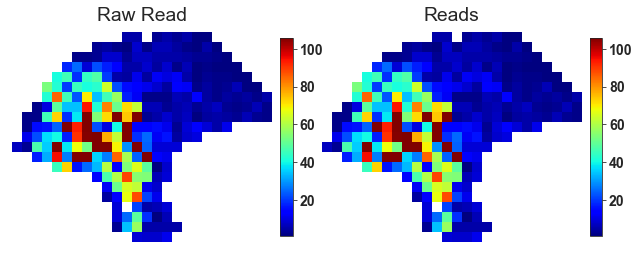

In [4]:
melanoma_stdata.set_plot_param(x_y_swap=True)
with sns.axes_style('white'):
    plt.rc('font', weight='bold')
    plt.rc('font', size=16)
    plt.rc('grid', lw=3)
    plt.rc('lines', lw=1)
    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    melanoma_stdata.plot_bleeding(0, save=True)

Gene: BRAFhuman
	 no bleeding filtering performed
	 29.474% bleeds out
Plot saved in zebrafish_A1_data/gene_bleeding_plots/


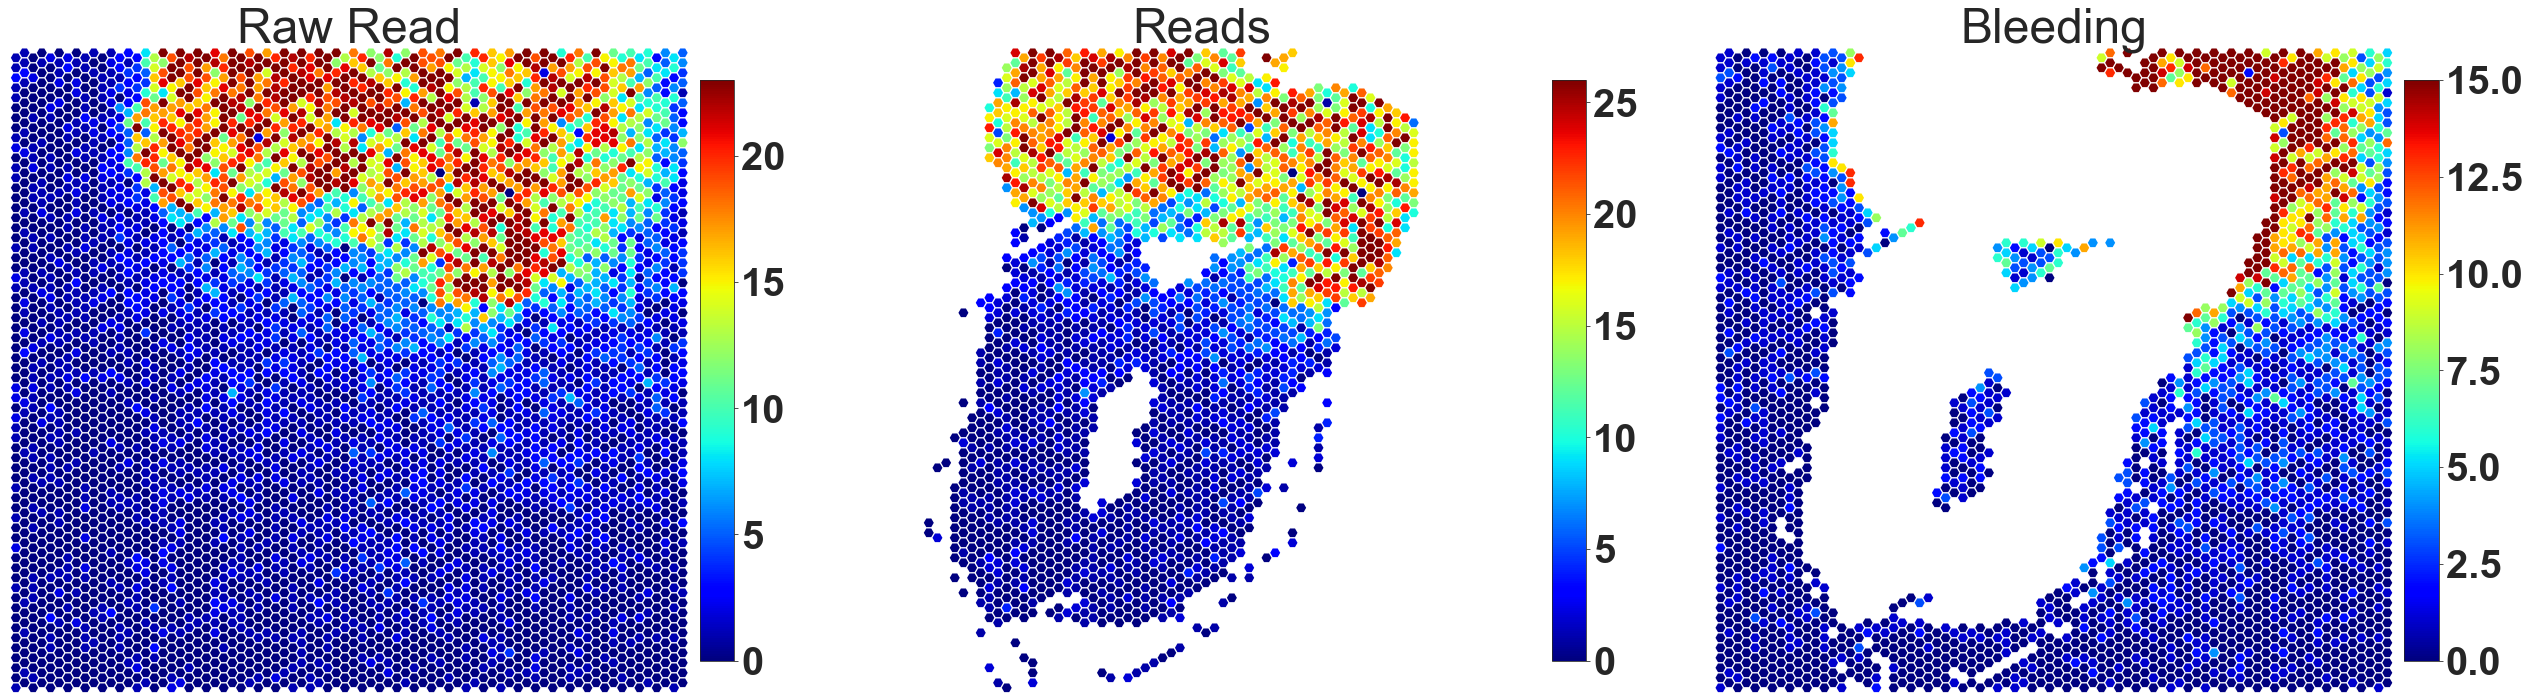

In [7]:
with sns.axes_style('white'):
    plt.rc('font', weight='bold')
    plt.rc('font', size=40)
    plt.rc('grid', lw=3)
    plt.rc('lines', lw=1)
    plt.rc('xtick', labelsize=40)
    plt.rc('ytick', labelsize=40)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    zebrafish_A1_stdata.plot_bleeding('BRAFhuman', save=True)

### Bleeding correction

In [9]:
zebrafish_A1_raw = bayestme_data.RawSTData(data_name='zebrafish_A1', load='zebrafish_A1_data/')

Loading data from zebrafish_A1_data/


In [3]:
zebrafish_A1_raw.bleeding_correction()

Loading data from zebrafish_A1_data/
Fitting basis functions to first 50 genes

Step 1/5
	Loss: 24851.28

Step 2/5
	Loss: 24851.28

Step 3/5
	Loss: 24851.28

Step 4/5
	Loss: 24851.28

Step 5/5
	Loss: 24851.28

Gene 1/919

Gene 2/919

Gene 3/919

Gene 4/919

Gene 5/919

Gene 6/919

Gene 7/919

Gene 8/919

Gene 9/919

Gene 10/919

Gene 11/919

Gene 12/919

Gene 13/919

Gene 14/919

Gene 15/919

Gene 16/919

Gene 17/919

Gene 18/919

Gene 19/919

Gene 20/919

Gene 21/919

Gene 22/919

Gene 23/919

Gene 24/919

Gene 25/919

Gene 26/919

Gene 27/919

Gene 28/919

Gene 29/919

Gene 30/919

Gene 31/919

Gene 32/919

Gene 33/919

Gene 34/919

Gene 35/919

Gene 36/919

Gene 37/919

Gene 38/919

Gene 39/919

Gene 40/919

Gene 41/919

Gene 42/919

Gene 43/919

Gene 44/919

Gene 45/919

Gene 46/919

Gene 47/919

Gene 48/919

Gene 49/919

Gene 50/919

Gene 51/919

Gene 52/919

Gene 53/919

Gene 54/919

Gene 55/919

Gene 56/919

Gene 57/919

Gene 58/919

Gene 59/919

Gene 60/919

Gene 61/919

Gene 6


Gene 579/919

Gene 580/919

Gene 581/919

Gene 582/919

Gene 583/919

Gene 584/919

Gene 585/919

Gene 586/919

Gene 587/919

Gene 588/919

Gene 589/919

Gene 590/919

Gene 591/919

Gene 592/919

Gene 593/919

Gene 594/919

Gene 595/919

Gene 596/919

Gene 597/919

Gene 598/919

Gene 599/919

Gene 600/919

Gene 601/919

Gene 602/919

Gene 603/919

Gene 604/919

Gene 605/919

Gene 606/919

Gene 607/919

Gene 608/919

Gene 609/919

Gene 610/919

Gene 611/919

Gene 612/919

Gene 613/919

Gene 614/919

Gene 615/919

Gene 616/919

Gene 617/919

Gene 618/919

Gene 619/919

Gene 620/919

Gene 621/919

Gene 622/919

Gene 623/919

Gene 624/919

Gene 625/919

Gene 626/919

Gene 627/919

Gene 628/919

Gene 629/919

Gene 630/919

Gene 631/919

Gene 632/919

Gene 633/919

Gene 634/919

Gene 635/919

Gene 636/919

Gene 637/919

Gene 638/919

Gene 639/919

Gene 640/919

Gene 641/919

Gene 642/919

Gene 643/919

Gene 644/919

Gene 645/919

Gene 646/919

Gene 647/919

Gene 648/919

Gene 649/919

Gene 

Loading data from zebrafish_A1_data/
Gene: BRAFhuman
Plot saved in zebrafish_A1_data/cleaned_data_plots/gene_bleeding_plots/


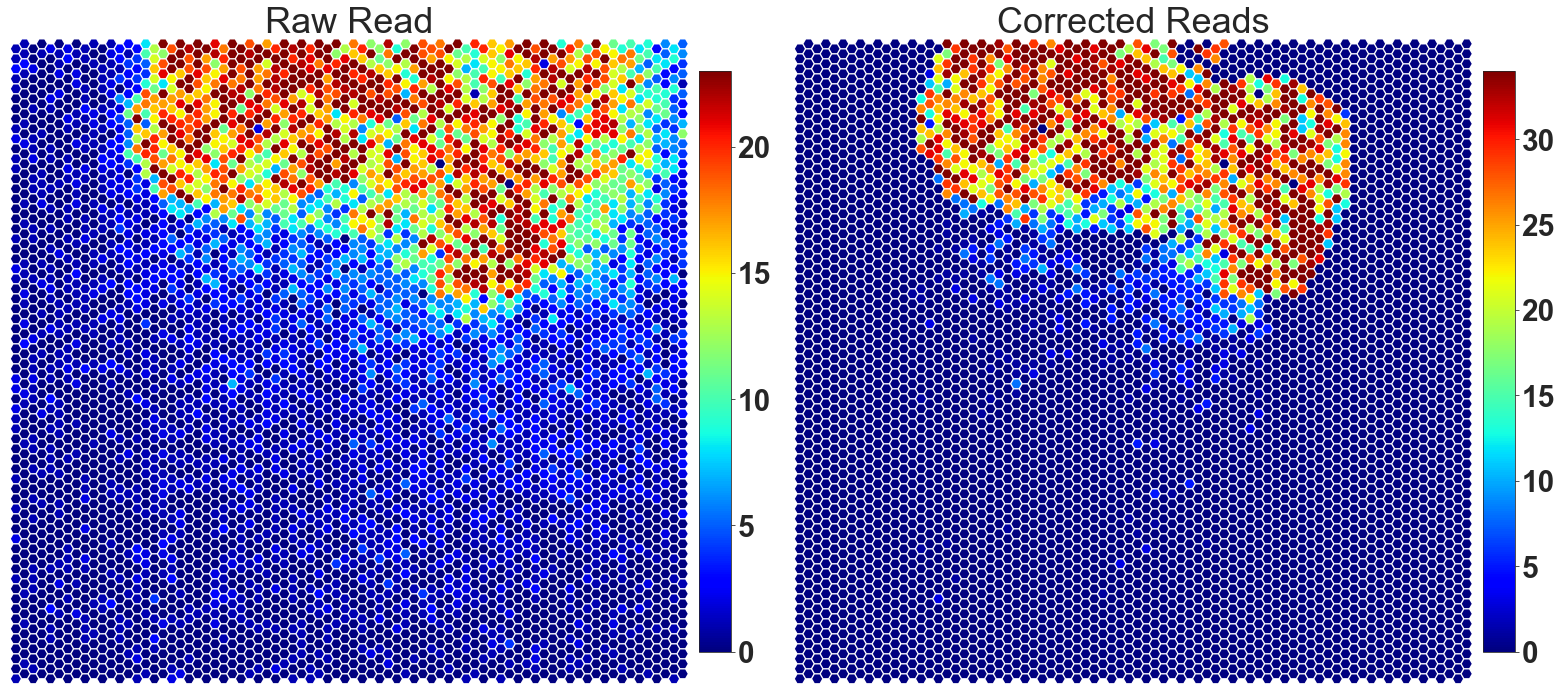

In [8]:
zebrafish_A1_clean = bayestme_data.CleanedSTData(load_path='zebrafish_A1_data/')
with sns.axes_style('white'):
    plt.rc('font', weight='bold')
    plt.rc('font', size=30)
    plt.rc('grid', lw=3)
    plt.rc('lines', lw=1)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    zebrafish_A1_clean.plot_before_after_cleanup('BRAFhuman', save=True)

### make K fold

Loading data from melanoma_results/
results at melanoma_results/k_fold/setup/results/melanoma/
log/error at melanoma_results/k_fold/setup/outputs
420 jobs generated
	 5 cv folds
	 14 n_comp grid: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
	 6 lambda grid: [1, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
	 1 n_gene grid: [918]


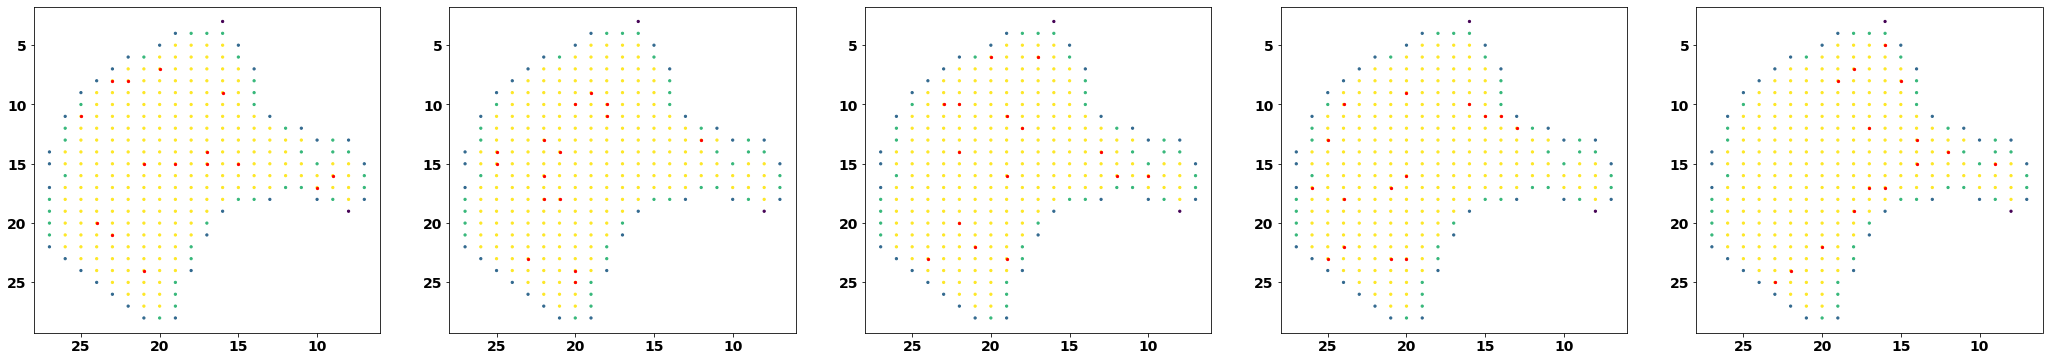

In [5]:
melanoma_kfold = melanoma_stdata.k_fold('../setup/')

`/k_fold/jobs` contains the job file, make sure copy `model_bkg.py`, `HMM_fast.py`, `gfbt_multinomail.py`, and `utils.py` in that folder and upload it to the job submit node

`/kfold/setup` contains the config files, upload everything in this folder to the cluster storage directory

### Deconvolve

In [6]:
melanoma_deconvolve = melanoma.deconvolve(melanoma_stdata, n_gene=1000, n_components=4, lam2=10000,
                                          n_samples=100, n_burnin=1000, n_thin=5)

experiment: melanoma, lambda 10000, 4 components
	 False lda, ST(square) layout, 120 max cells, 918(1000) gene
sampling: 1000 burn_in, 100 samples, 5 thinning
storage: BayesTME_results/
Step 1500/1500 finished!


Loading data from melanoma_results/


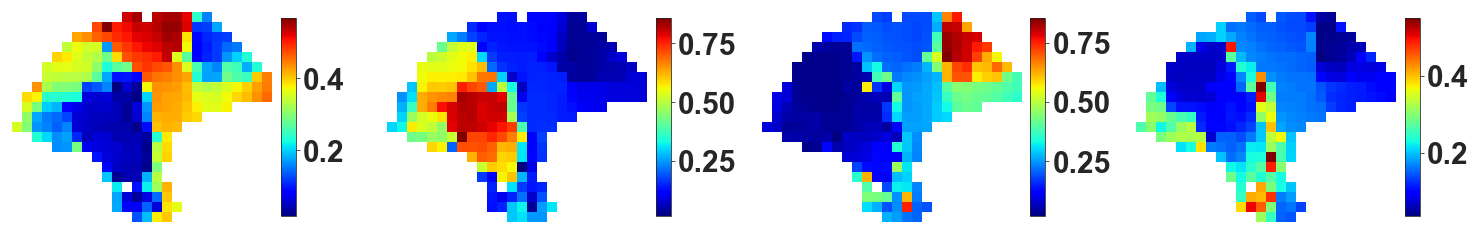

In [11]:
melanoma_deconvolve = bayestme_data.DeconvolvedSTData(stdata=melanoma_stdata, load_path='melanoma_results/results/')
with sns.axes_style('white'):
    plt.rc('font', weight='bold')
    plt.rc('font', size=30)
    plt.rc('grid', lw=3)
    plt.rc('lines', lw=1)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    melanoma_deconvolve.plot_deconvolution('cell_prob')

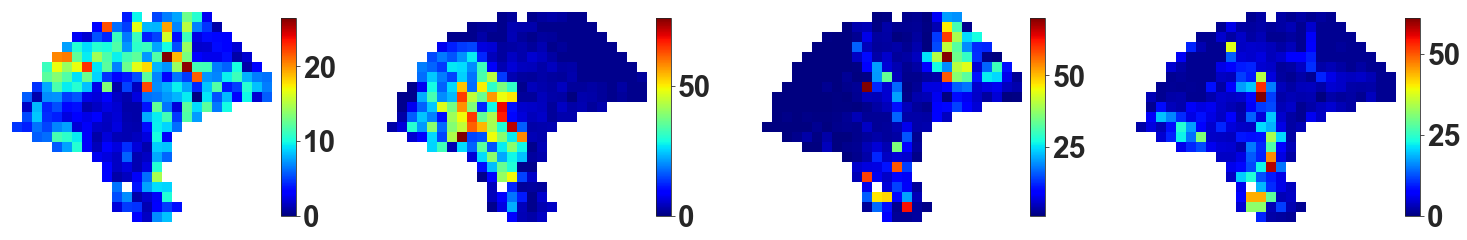

In [12]:
with sns.axes_style('white'):
    plt.rc('font', weight='bold')
    plt.rc('font', size=30)
    plt.rc('grid', lw=3)
    plt.rc('lines', lw=1)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    melanoma_deconvolve.plot_deconvolution('cell_num')